<h1>Desafio Quantamental Itaú - 2023</h1>
<h3>Lamia - Modelo 05</h3>
<h4>Cadeia de Markov </h4>

In [1]:
import yfinance as yf
import numpy as np

# Função para obter dados históricos de um ativo usando a API do Yahoo Finance
def obter_dados_yahoo(ticker, inicio, fim):
    dados = yf.download(ticker, start=inicio, end=fim)
    return dados

# Função para calcular os estados com base nos retornos diários
def calcular_estados(retornos_diarios):
    estados = []
    for retorno in retornos_diarios:
        if retorno > 0:
            estados.append(1)  # Estado de alta
        elif retorno < 0:
            estados.append(0)  # Estado de baixa
        else:
            estados.append(2)  # Estado neutro
    return estados

# Função para calcular a matriz de transição da cadeia de Markov
def calcular_matriz_transicao(estados):
    matriz_transicao = np.zeros((3, 3))
    for i in range(len(estados) - 1):
        estado_atual = estados[i]
        proximo_estado = estados[i + 1]
        matriz_transicao[estado_atual][proximo_estado] += 1
    matriz_transicao = matriz_transicao / matriz_transicao.sum(axis=1, keepdims=True)
    return matriz_transicao

# Ticker do ativo
ticker = "AAPL"
inicio = "2022-01-01"
fim = "2022-12-31"

# Obter dados históricos do Yahoo Finance
dados = obter_dados_yahoo(ticker, inicio, fim)

# Calcular retornos diários
dados["Retorno Diário"] = dados["Adj Close"].pct_change().dropna()

# Calcular estados usando a função calcular_estados
estados = calcular_estados(dados["Retorno Diário"])

# Calcular matriz de transição usando a função calcular_matriz_transicao
matriz_transicao = calcular_matriz_transicao(estados)

# Imprimir a matriz de transição
print("Matriz de Transição da Cadeia de Markov:")
print(matriz_transicao)


ModuleNotFoundError: No module named 'yfinance'

---------

<h2>Cadeia de Markov com Reinforcement Learning</h2>

In [5]:
import yfinance as yf
import gym
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from collections import deque

# Função para obter dados históricos de um ativo usando a API do Yahoo Finance
def obter_dados_yahoo(ticker, inicio, fim):
    dados = yf.download(ticker, start=inicio, end=fim)
    return dados

# Função para calcular os estados com base nos retornos diários
def calcular_estados(retornos_diarios):
    estados = []
    for retorno in retornos_diarios:
        if retorno > 0:
            estados.append(1)  # Estado de alta
        elif retorno < 0:
            estados.append(0)  # Estado de baixa
        else:
            estados.append(2)  # Estado neutro
    return estados

# Classe do ambiente de negociação personalizado usando OpenAI Gym
class MercadoEnv(gym.Env):
    def __init__(self, dados):
        super(MercadoEnv, self).__init__()
        self.dados = dados
        self.estados = calcular_estados(self.dados["Retorno Diário"].values)
        self.observacao_space = gym.spaces.Discrete(3)
        self.action_space = gym.spaces.Discrete(2)
        self.current_step = 0

    def reset(self):
        self.current_step = 0
        return self.estados[self.current_step]

    def step(self, action):
        self.current_step += 1
        done = self.current_step >= len(self.estados) - 1
        if done:
            próximo_estado = self.estados[self.current_step - 1]
            recompensa = 0  # Sem recompensa no estado final
        else:
            próximo_estado = self.estados[self.current_step]
            recompensa = 1 if action == próximo_estado else -1
        return próximo_estado, recompensa, done, {}

# Criar ambiente de negociação
ticker = "AAPL"
inicio = "2022-01-01"
fim = "2022-12-31"
dados = obter_dados_yahoo(ticker, inicio, fim)
dados["Retorno Diário"] = dados["Adj Close"].pct_change().dropna()
env = MercadoEnv(dados)

# Construir modelo DQN
modelo = Sequential()
modelo.add(Dense(24, input_shape=(1,), activation="relu"))
modelo.add(Dense(24, activation="relu"))
modelo.add(Dense(2, activation="linear"))
modelo.compile(loss="mse", optimizer=Adam(lr=0.001))

# Treinar o agente usando DQN
n_episodes = 100
for episode in range(n_episodes):
    estado = env.reset()
    estado = np.reshape(estado, [1, 1])
    for step in range(len(env.estados) - 1):
        ação = modelo.predict(estado)
        ação = np.argmax(ação[0])
        próximo_estado, recompensa, done, _ = env.step(ação)
        próximo_estado = np.reshape(próximo_estado, [1, 1])
        alvo = recompensa + 0.99 * np.amax(modelo.predict(próximo_estado)[0])
        target_f = modelo.predict(estado)
        target_f[0][ação] = alvo
        modelo.fit(estado, target_f, epochs=1, verbose=0)
        estado = próximo_estado
        if done:
            break

# Testar o agente treinado
estado = env.reset()
estado = np.reshape(estado, [1, 1])
for step in range(len(env.estados) - 1):
    ação = modelo.predict(estado)
    ação = np.argmax(ação[0])
    próximo_estado, recompensa, done, _ = env.step(ação)
    próximo_estado = np.reshape(próximo_estado, [1, 1])
    estado = próximo_estado
    if done:
        break


In [10]:
#Step 1b: Import Market data
df = yf.download('TSLA', period = '1d', interval = '1m')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-01-07 09:30:00-05:00,1080.369995,1080.369995,1069.000000,1071.959961,1071.959961,998195
2022-01-07 09:31:00-05:00,1073.099976,1074.704224,1065.439941,1068.749878,1068.749878,155324
2022-01-07 09:32:00-05:00,1067.989990,1069.109985,1061.719971,1064.059937,1064.059937,124841
2022-01-07 09:33:00-05:00,1060.000000,1060.000000,1056.701904,1059.670044,1059.670044,181803
2022-01-07 09:34:00-05:00,1058.500000,1062.469971,1056.600098,1057.005859,1057.005859,125751
...,...,...,...,...,...,...
2022-01-07 15:55:00-05:00,1027.234985,1027.777588,1026.210083,1027.475952,1027.475952,89793
2022-01-07 15:56:00-05:00,1027.430054,1029.000000,1027.430054,1028.280029,1028.280029,100751
2022-01-07 15:57:00-05:00,1028.275024,1028.829956,1026.869995,1027.750000,1027.750000,94824


In [11]:
#Step 1c: Visualisation quick tip 

#declare figure
fig = go.Figure()

#Set up traces
fig.add_trace(go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title='Tesla price',
    yaxis_title='Stock Price (USD per Shares)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="30m", step="minute", stepmode="backward"),
            dict(count=6, label="90m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()

<h2> Step 2: Data Processing</h2>

In [ ]:
#Step 2a: Data cleaning

In [ ]:
df = df.drop(df[df['Volume'] == 0].index)
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-10-08 09:30:00-04:00,796.210022,796.380005,793.109985,793.380005,793.380005,678459
2021-10-08 09:31:00-04:00,793.469971,795.500000,793.250000,794.429993,794.429993,134236
2021-10-08 09:32:00-04:00,794.579590,795.200012,792.640015,793.554993,793.554993,131326
2021-10-08 09:33:00-04:00,793.500000,793.669983,793.099976,793.250000,793.250000,99007
2021-10-08 09:34:00-04:00,792.000000,792.190002,790.690002,790.700012,790.700012,167499
...,...,...,...,...,...,...
2021-10-08 15:55:00-04:00,785.539978,785.539978,784.974976,785.099976,785.099976,46769
2021-10-08 15:56:00-04:00,785.080017,785.299988,784.910095,785.063110,785.063110,42703
2021-10-08 15:57:00-04:00,785.130005,785.659973,785.059998,785.320007,785.320007,55105


In [ ]:
#Step 2b: Add Trading Indicator

In [ ]:
#Add RSI(Relative Strength Index) + Visualisation

In [ ]:
# O ta.RSI recebe como primeiro parametro um array, então transformamos a coluna Close do df. O sgundo argumento é o período de tempo
n=10
df['RSI'] = ta.RSI(np.array(df['Close'].shift(1)),timeperiod= n)
df

NameError: name 'df' is not defined

Exception in thread Thread-9:
Traceback (most recent call last):
  File "C:\Users\gustavo.j.siebel\AppData\Local\Programs\Python\Python39\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\gustavo.j.siebel\AppData\Local\Programs\Python\Python39\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\gustavo.j.siebel\AppData\Local\Programs\Python\Python39\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\gustavo.j.siebel\AppData\Local\Programs\Python\Python39\lib\site-packages\urllib3\connection.py", line 416, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\gustavo.j.siebel\AppData\Local\Programs\Python\Python39\lib\site-packages\urllib3\util\ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "C:\Users\gustavo.j.siebel\AppData\Local\Programs\Py

In [ ]:
# Vizualição de gráfica de como o RSI se corresponde ao mercado

from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1, row_heights=[0.7, 0.3])

fig.add_trace(go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'], name = 'market data'),
              row=1, col=1)

fig.update_xaxes(
    rangeslider_visible=False)

fig.add_trace(go.Scatter(x=df.index,
                y=df['RSI'] , name = 'RSI', line=dict(color='royalblue', width=1.2)),
              row=2, col=1)

fig.show()

NameError: name 'go' is not defined

In [ ]:
# Create a column by name, SMA and assign the SMA calculation to it
df['SMA'] = df['Close'].shift(1).rolling(window=n).mean()

# Create a column by name, Corr and assign the calculation of correlation to it
df['Corr'] = df['Close'].shift(1).rolling(window=n).corr(df['SMA'].shift(1))

# Create a column by name, SAR and assign the SAR calculation to it
df['SAR'] = ta.SAR(np.array(df['High'].shift(1)), np.array(df['Low'].shift(1)),
                   0.2, 0.2)

# Create a column by name, ADX and assign the ADX calculation to it
df['ADX'] = ta.ADX(np.array(df['High'].shift(1)), np.array(df['Low'].shift(1)),
                   np.array(df['Open']), timeperiod=n)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,Corr,SAR,ADX
Datetime,,,,,,,,,,,
2021-10-08 09:30:00-04:00,796.210022,796.380005,793.109985,793.380005,793.380005,678459,NaN,NaN,NaN,NaN,NaN
2021-10-08 09:31:00-04:00,793.469971,795.500000,793.250000,794.429993,794.429993,134236,NaN,NaN,NaN,NaN,NaN
2021-10-08 09:32:00-04:00,794.579590,795.200012,792.640015,793.554993,793.554993,131326,NaN,NaN,NaN,793.109985,NaN
2021-10-08 09:33:00-04:00,793.500000,793.669983,793.099976,793.250000,793.250000,99007,NaN,NaN,NaN,795.500000,NaN
2021-10-08 09:34:00-04:00,792.000000,792.190002,790.690002,790.700012,790.700012,167499,NaN,NaN,NaN,795.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-08 15:55:00-04:00,785.539978,785.539978,784.974976,785.099976,785.099976,46769,28.425666,786.332501,0.864139,786.005885,44.982958
2021-10-08 15:56:00-04:00,785.080017,785.299988,784.910095,785.063110,785.063110,42703,26.081092,786.070502,0.838729,785.698702,46.969336
2021-10-08 15:57:00-04:00,785.130005,785.659973,785.059998,785.320007,785.320007,55105,25.857103,785.800812,0.786312,785.599976,48.823505


In [ ]:
# Create columns high, low and close with previous minute's OHLC data
df['Prev_High'] = df['High'].shift(1)
df['Prev_Low'] = df['Low'].shift(1)
df['Prev_Close'] = df['Close'].shift(1)

In [ ]:
df['OO']= df['Open'] - df['Open'].shift(1)
df['OC']= df['Open'] - df['Prev_Close']

In [ ]:
df['Ret'] = (df['Open'].shift(-1)-df['Open'])/df['Open']

# Create n columns and assign
for i in range(1, n):
    df['return%i' % i] = df['Ret'].shift(i)

### Data cleaning!

In [ ]:
df.loc[df['Corr'] < -1, 'Corr'] = -1

df.loc[df['Corr'] > 1, 'Corr'] = 1

df = df.dropna()

### Data architecture 

In [ ]:
t = .8

split = int(t*len(df))
split

295

### Define output signals

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

df['Signal'] = 0

df.loc[df['Ret'] > df['Ret'][:split].quantile(q=0.66), 'Signal'] = 1

df.loc[df['Ret'] < df['Ret'][:split].quantile(q=0.34), 'Signal'] = -1

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,Corr,SAR,...,return1,return2,return3,return4,return5,return6,return7,return8,return9,Signal
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-10-08 09:50:00-04:00,786.000000,786.089905,785.679993,785.719971,785.719971,61725,41.609328,786.724884,0.759541,784.400024,...,0.000000,0.001274,-0.000637,0.000637,-0.001272,0.000000,-0.002854,0.000317,0.000000,1
2021-10-08 09:51:00-04:00,787.000000,787.080017,786.789978,787.039978,787.039978,56415,36.962360,786.468732,0.719961,784.400024,...,0.001272,0.000000,0.001274,-0.000637,0.000637,-0.001272,0.000000,-0.002854,0.000317,-1
2021-10-08 09:52:00-04:00,786.000000,786.442871,785.510010,785.719971,785.719971,61264,43.768319,786.327728,0.425623,784.934680,...,-0.001271,0.001272,0.000000,0.001274,-0.000637,0.000637,-0.001272,0.000000,-0.002854,-1
2021-10-08 09:53:00-04:00,784.500000,785.299988,784.500000,785.049988,785.049988,79873,39.080152,786.139728,0.275501,785.363748,...,-0.001908,-0.001271,0.001272,0.000000,0.001274,-0.000637,0.000637,-0.001272,0.000000,1
2021-10-08 09:54:00-04:00,785.000000,785.575012,784.299988,785.288879,785.288879,100092,36.853913,785.819727,-0.137973,787.080017,...,0.000637,-0.001908,-0.001271,0.001272,0.000000,0.001274,-0.000637,0.000637,-0.001272,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-08 15:54:00-04:00,785.340027,785.599976,785.099976,785.489990,785.489990,55512,26.127575,786.613495,0.911546,786.389863,...,0.000306,0.000688,-0.001286,-0.001500,-0.000432,-0.000876,0.000013,0.000051,-0.000546,1
2021-10-08 15:55:00-04:00,785.539978,785.539978,784.974976,785.099976,785.099976,46769,28.425666,786.332501,0.864139,786.005885,...,0.000255,0.000306,0.000688,-0.001286,-0.001500,-0.000432,-0.000876,0.000013,0.000051,-1
2021-10-08 15:56:00-04:00,785.080017,785.299988,784.910095,785.063110,785.063110,42703,26.081092,786.070502,0.838729,785.698702,...,-0.000586,0.000255,0.000306,0.000688,-0.001286,-0.001500,-0.000432,-0.000876,0.000013,0


In [ ]:
X = df.drop(['Close','Signal','High','Low','Volume','Ret'], axis=1)

In [ ]:
y = df['Signal']

Datetime
2021-10-08 09:50:00-04:00    1
2021-10-08 09:51:00-04:00   -1
2021-10-08 09:52:00-04:00   -1
2021-10-08 09:53:00-04:00    1
2021-10-08 09:54:00-04:00    0
                            ..
2021-10-08 15:54:00-04:00    1
2021-10-08 15:55:00-04:00   -1
2021-10-08 15:56:00-04:00    0
2021-10-08 15:57:00-04:00    1
2021-10-08 15:58:00-04:00    1
Name: Signal, Length: 369, dtype: int64

In [ ]:
c = [10,100,1000,10000]
g = [1e-2,1e-1,1e0]

# Intialise the parameters
parameters = {'svc__C': c,
              'svc__gamma': g,
              'svc__kernel': ['rbf']
              }

steps = [('scaler', StandardScaler()), ('svc',SVC())]

pipeline = Pipeline(steps)


# Call the RandomizedSearchCV function and pass the parameters
rcv = RandomizedSearchCV(pipeline, parameters, cv=TimeSeriesSplit(n_splits=2))

In [ ]:
rcv.fit(X.iloc[:split], y.iloc[:split])

best_C = rcv.best_params_['svc__C']
best_gamma = rcv.best_params_['svc__gamma']
best_kernel = rcv.best_params_['svc__kernel']

# Create SVC

In [ ]:
cls = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma)

# Train data

In [ ]:
ss = StandardScaler()
cls.fit(ss.fit_transform(X.iloc[:split]), y.iloc[:split])

SVC(C=1000, gamma=0.01)

# Predict Signal

In [ ]:
y_predict = cls.predict(ss.transform(X.iloc[split:]))

df['Pred_Signal'] = 0

In [ ]:
y_predict

array([ 0,  0, -1,  1,  0,  1, -1,  1,  0, -1,  1, -1, -1,  1, -1,  1, -1,
       -1,  1,  1, -1,  0,  1,  1,  1, -1,  0,  0,  1,  0, -1, -1, -1,  1,
        1, -1,  1,  1,  1, -1, -1,  0,  1,  1,  0,  1,  1,  1,  1,  1, -1,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1, -1,  0, -1, -1,  1,
        1,  1, -1,  1,  0,  0])

In [ ]:
# Save the predicted values for the train data
df.iloc[:split, df.columns.get_loc('Pred_Signal')] = pd.Series(
    cls.predict(ss.transform(X.iloc[:split])).tolist())

# Save the predicted values for the test data
df.iloc[split:, df.columns.get_loc('Pred_Signal')] = y_predict

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,Corr,SAR,...,return2,return3,return4,return5,return6,return7,return8,return9,Signal,Pred_Signal
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-10-08 09:50:00-04:00,786.000000,786.089905,785.679993,785.719971,785.719971,61725,41.609328,786.724884,0.759541,784.400024,...,0.001274,-0.000637,0.000637,-0.001272,0.000000,-0.002854,0.000317,0.000000,1,NaN
2021-10-08 09:51:00-04:00,787.000000,787.080017,786.789978,787.039978,787.039978,56415,36.962360,786.468732,0.719961,784.400024,...,0.000000,0.001274,-0.000637,0.000637,-0.001272,0.000000,-0.002854,0.000317,-1,NaN
2021-10-08 09:52:00-04:00,786.000000,786.442871,785.510010,785.719971,785.719971,61264,43.768319,786.327728,0.425623,784.934680,...,0.001272,0.000000,0.001274,-0.000637,0.000637,-0.001272,0.000000,-0.002854,-1,NaN
2021-10-08 09:53:00-04:00,784.500000,785.299988,784.500000,785.049988,785.049988,79873,39.080152,786.139728,0.275501,785.363748,...,-0.001271,0.001272,0.000000,0.001274,-0.000637,0.000637,-0.001272,0.000000,1,NaN
2021-10-08 09:54:00-04:00,785.000000,785.575012,784.299988,785.288879,785.288879,100092,36.853913,785.819727,-0.137973,787.080017,...,-0.001908,-0.001271,0.001272,0.000000,0.001274,-0.000637,0.000637,-0.001272,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-08 15:54:00-04:00,785.340027,785.599976,785.099976,785.489990,785.489990,55512,26.127575,786.613495,0.911546,786.389863,...,0.000688,-0.001286,-0.001500,-0.000432,-0.000876,0.000013,0.000051,-0.000546,1,1.0
2021-10-08 15:55:00-04:00,785.539978,785.539978,784.974976,785.099976,785.099976,46769,28.425666,786.332501,0.864139,786.005885,...,0.000306,0.000688,-0.001286,-0.001500,-0.000432,-0.000876,0.000013,0.000051,-1,-1.0
2021-10-08 15:56:00-04:00,785.080017,785.299988,784.910095,785.063110,785.063110,42703,26.081092,786.070502,0.838729,785.698702,...,0.000255,0.000306,0.000688,-0.001286,-0.001500,-0.000432,-0.000876,0.000013,0,1.0


In [ ]:
df['Ret1'] = df['Ret']*df['Pred_Signal']

# Backtest

In [ ]:
fig = go.Figure()

#Set up traces
fig.add_trace(go.Scatter(x=df.index[split:], y= (df['Ret'][split:]+1).cumprod(),line=dict(color='royalblue', width=.8), name = 'stock_returns'))
fig.add_trace(go.Scatter(x=df.index[split:], y= (df['Ret1'][split:]+1).cumprod(),line=dict(color='orange', width=.8), name = 'strategy_returns'))

# Add titles
fig.update_layout(
    title='Support Vector Machine Strategy',
    yaxis_title='Stock return (% Return)')

fig.show()

In [ ]:
cm = confusion_matrix(y[split:],y_predict)
cm

array([[18,  7,  0],
       [ 3, 10,  8],
       [ 1,  6, 21]])

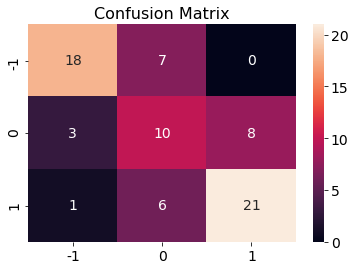

In [ ]:
# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font sizes
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams.update({'font.size': 14})

# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

# Set the axis labels
ax.xaxis.set_ticklabels(['-1', '0', '1'])
ax.yaxis.set_ticklabels(['-1', '0', '1'])
plt.show()

In [ ]:
# Calculate the classification report
cr = classification_report(y[split:], y_predict)
print(cr)

              precision    recall  f1-score   support

          -1       0.82      0.72      0.77        25
           0       0.43      0.48      0.45        21
           1       0.72      0.75      0.74        28

    accuracy                           0.66        74
   macro avg       0.66      0.65      0.65        74
weighted avg       0.67      0.66      0.67        74

